## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Set path to working directory

path = '/Users/timovic/Desktop/Climate Analysis - battle station/02 Data'

In [3]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'all_merged.csv'), index_col=None)

## 2. Data cleaning

In [4]:
df.shape

(6045, 9)

In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'year', 'hdi', 'gni', 'co2_consumption',
       'happiness', 'hdi_groups', 'undp_regions'],
      dtype='object')

In [6]:
# Drop unnamed column

df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.dtypes

country             object
year                 int64
hdi                float64
gni                float64
co2_consumption    float64
happiness          float64
hdi_groups          object
undp_regions        object
dtype: object

In [8]:
df.head()

,country,year,hdi,gni,co2_consumption,happiness,hdi_groups,undp_regions
0,Afghanistan,1990,0.273,2684.550019,NaN,NaN,Low,SA
1,Afghanistan,1991,0.279,2276.289409,NaN,NaN,Low,SA
2,Afghanistan,1992,0.287,2059.868084,NaN,NaN,Low,SA
3,Afghanistan,1993,0.297,1525.533426,NaN,NaN,Low,SA
4,Afghanistan,1994,0.292,1087.961890,NaN,NaN,Low,SA


In [9]:
# Checking for missing values, which are to be expected as the columns come from different datasets and do not fully align

df.isnull().sum()

country               0
year                  0
hdi                 665
gni                 130
co2_consumption    2501
happiness          5259
hdi_groups          124
undp_regions       1364
dtype: int64

In [10]:
# Check for duplicates

df_dups = df[df.duplicated()]

In [11]:
df_dups.shape

(0, 8)

In [12]:
# Check for mixed datatypes in columns

for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

hdi_groups
undp_regions


In [13]:
# Set columns "hdi_groups" and "undp_regions" to object

df = df.astype({"hdi_groups": object, "undp_regions": object})

## 3. Exploring relationships

### Correlations:

In [14]:
# Create correlation matrix

df.corr()

,year,hdi,gni,co2_consumption,happiness
year,1.000000,0.244149,0.114750,0.001706,0.039135
hdi,0.244149,1.000000,0.739145,0.649475,0.808306
gni,0.114750,0.739145,1.000000,0.869825,0.776280
co2_consumption,0.001706,0.649475,0.869825,1.000000,0.590055
happiness,0.039135,0.808306,0.776280,0.590055,1.000000


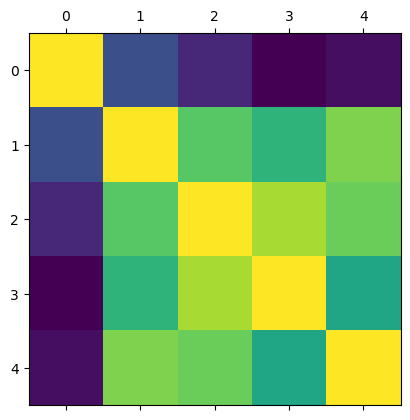

In [15]:
# Create a correlation heatmap using matplotlip

plt.matshow(df.corr())
plt.show()

In [16]:
df.columns

Index(['country', 'year', 'hdi', 'gni', 'co2_consumption', 'happiness',
       'hdi_groups', 'undp_regions'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

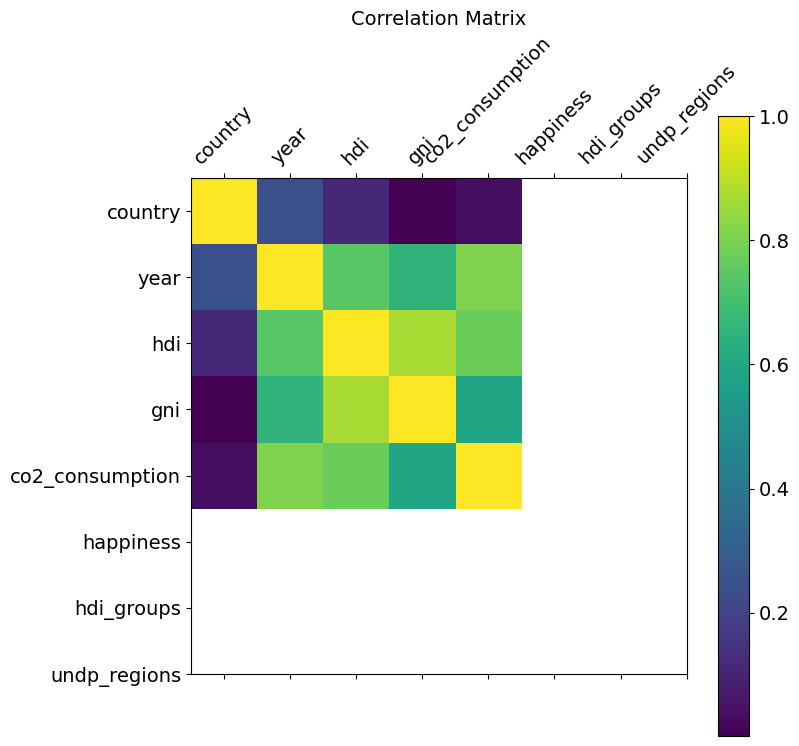

In [17]:
# Add labels and legend, change size of heatmap

f = plt.figure(figsize = (8,8))
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize = 14, rotation = 45)
plt.yticks(range(df.shape[1]), df.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 14)

In [18]:
# Drop columns "country", hdi_groups" and "undp_regions" in a new subset

sub = df[['year', 'hdi', 'gni', 'co2_consumption', 'happiness']]

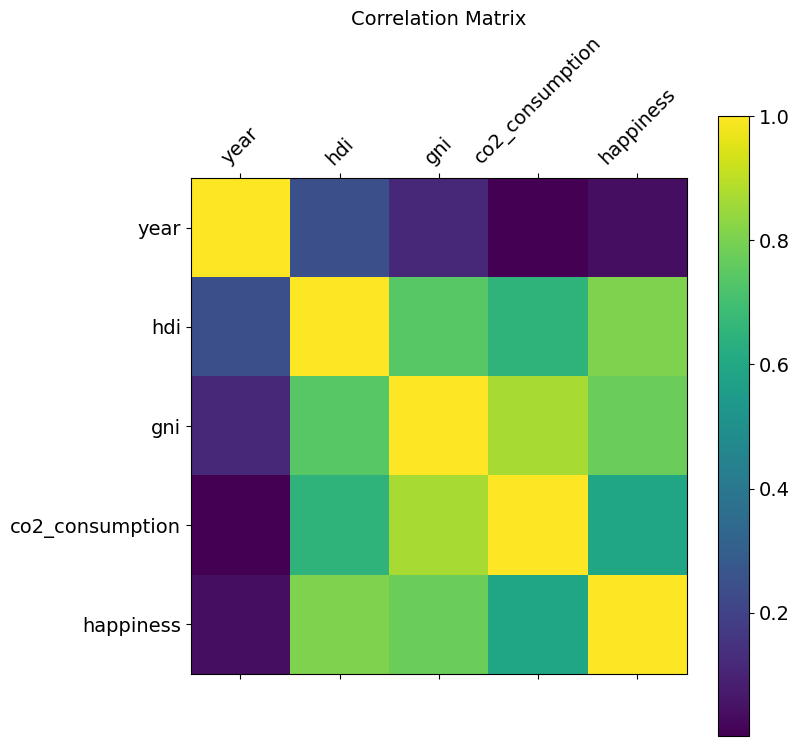

In [19]:
# Create heatmap of subset and save figure

f = plt.figure(figsize = (8,8))
plt.matshow(sub.corr(), fignum = f.number)
plt.xticks(range(sub.shape[1]), sub.columns, fontsize = 14, rotation = 45)
plt.yticks(range(sub.shape[1]), sub.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 14)
plt.savefig("corr_heat.png")

In [20]:
# Check current dir
cwd = os.getcwd()
cwd

'/Users/timovic/Desktop/Climate Analysis - battle station/03 Scripts'

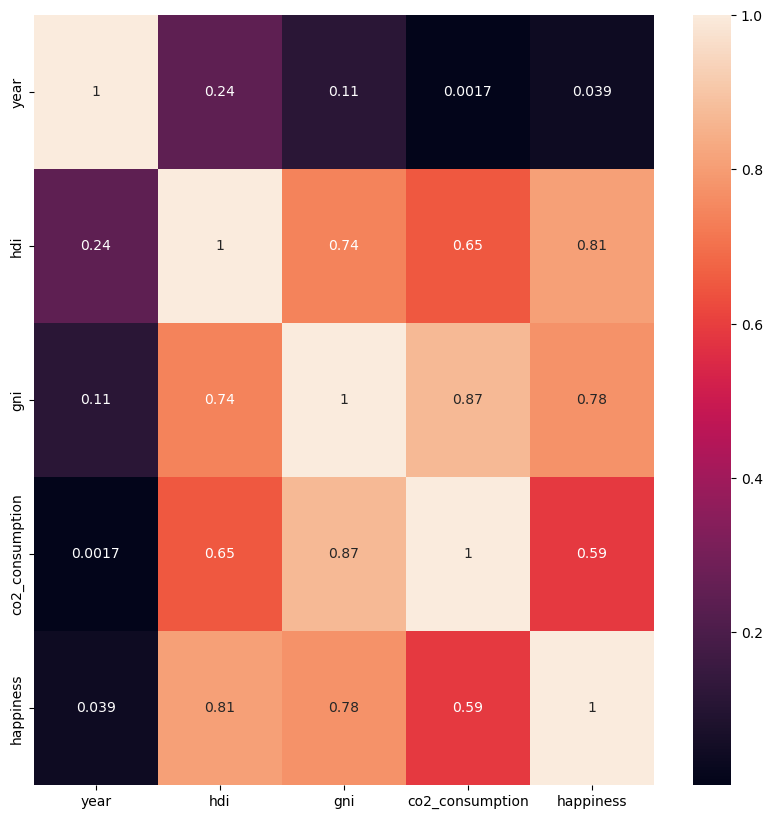

In [21]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

Excluding "year", all variables show a strong positive correlation (over 0.5). Three are above or about 0.8, and thus show a very strong positive relationship: 

1. co2_consumption and gni (0.87)
2. happiness and hdi (0.81)
3. happiness and gni (0.78)

I will create scatterplots to examine the relationship between these three variables.

### Scatterplots

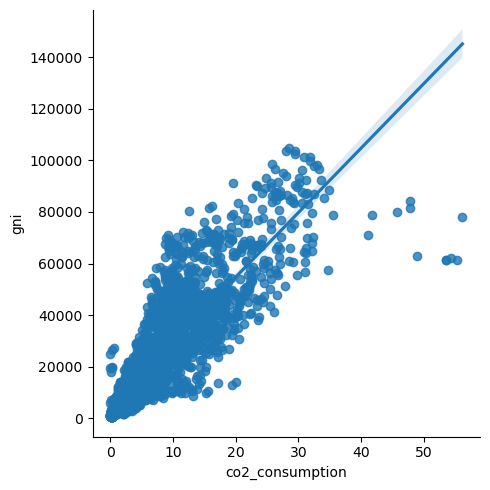

In [22]:
# Create a scatterplot for "co2_consumption" and "gni" columns in seaborn

sns.lmplot(x = 'co2_consumption', y = 'gni', data = df)

Here, we observe a strong positive correlation between the two variables. A few outliers with very high CO2 consumption show that the positive relationship with gni stops at about 30 tons of CO2 per capita and year. 

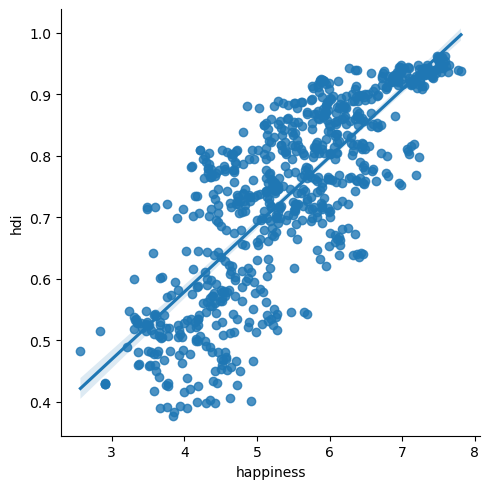

In [23]:
# Create a scatterplot for "happiness" and "hdi" columns in seaborn

sns.lmplot(x = 'happiness', y = 'hdi', data = df)

Again a very strong positive correlation. We can observe that even in countries with very low human development score, we often get close to the average world happiness score (5.57). At and above high development scores (0.7), the happiness scores start to increase more slowly.

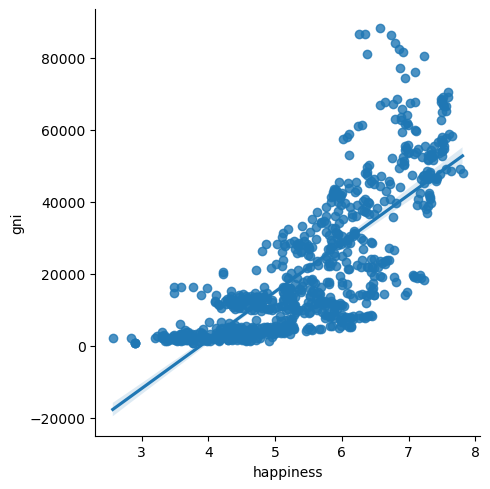

In [24]:
# Create a scatterplot for "gni" and "happiness" columns in seaborn

sns.lmplot(x = 'happiness', y = 'gni', data = df)

A less pronounced positive correlation here, as surprisingly high happiness scores can be observed even in countries with very low gni. 

### Pair Plots:

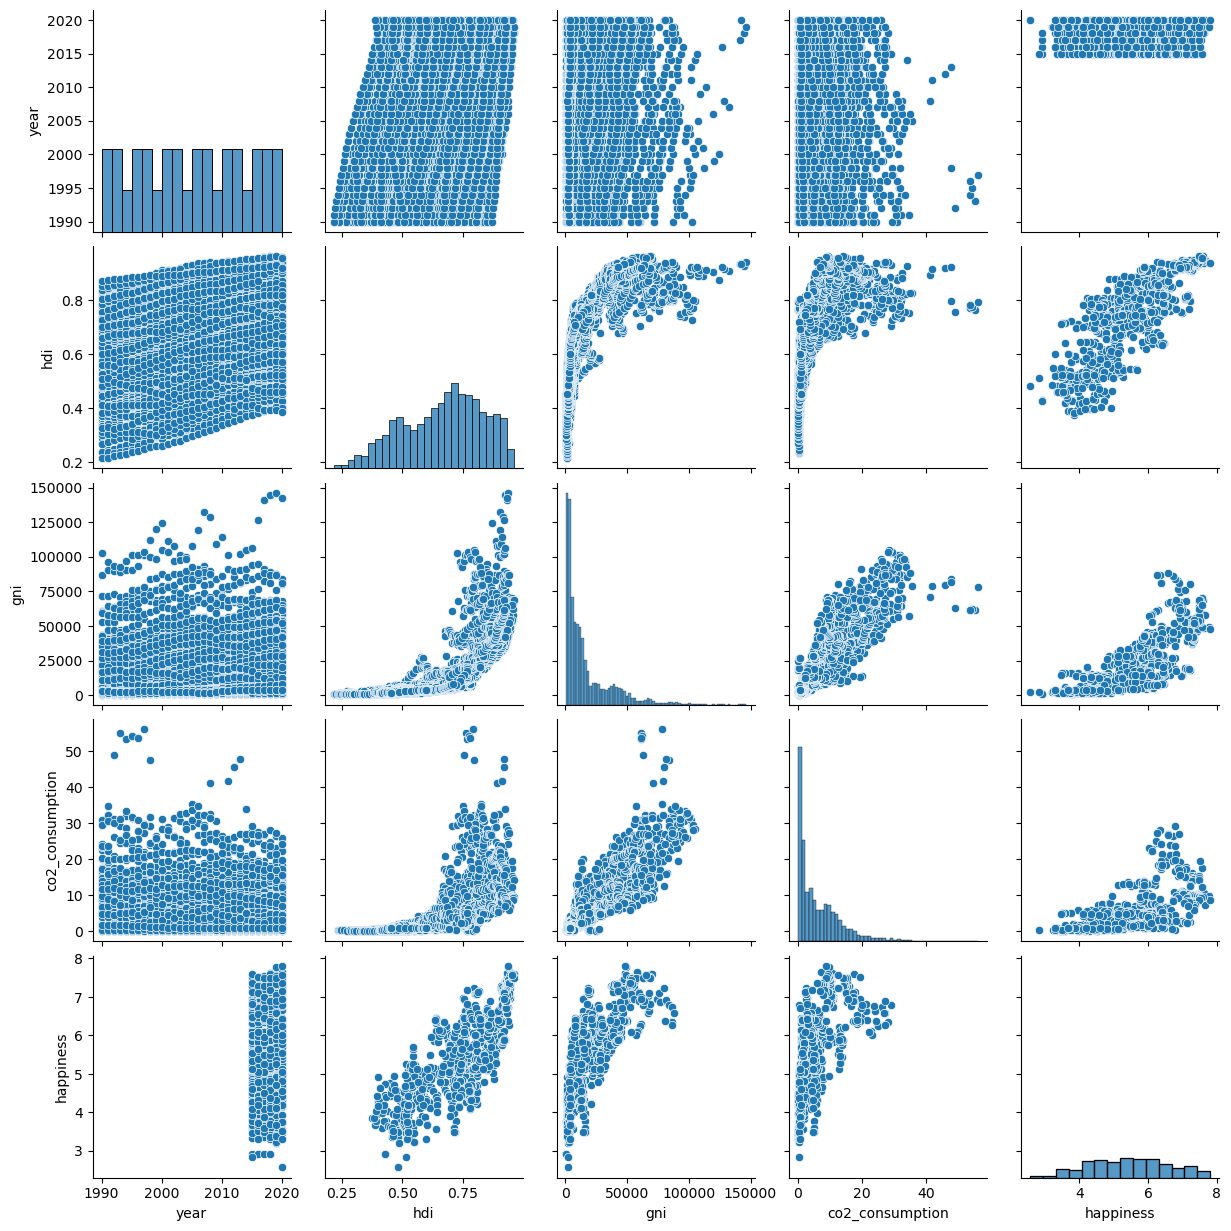

In [25]:
g = sns.pairplot(sub)

Looking at the pair plot, I would like to further explore the following relationships: 

1. co2_consumption and hdi: It would appear that just about at reaching high development scores (0.7), CO2 consumption increases dramatically. This would be relevant to my research questions.

2. co2_consumption and happiness: Apparently very high happiness scores can be achieved with relartively low CO2 consumption levels. This too would be an interesting insight for my research questions.

In [26]:
# Save image to working directory

g.savefig("pairplot.png") 

### Categorical Plots:

<AxesSubplot: xlabel='happiness', ylabel='Count'>

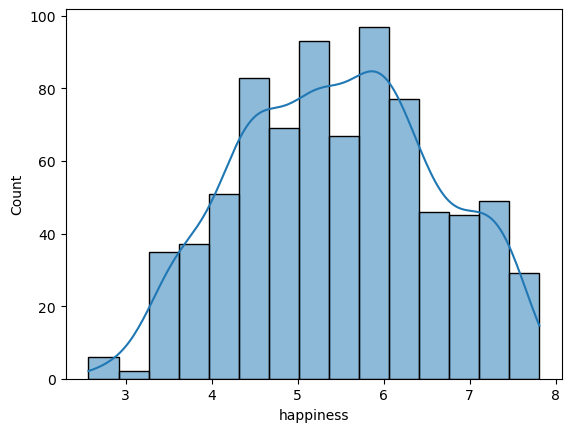

In [27]:
# Create a histogram to determine categories for the distribution of happiness scores

sns.histplot(df['happiness'], bins = 15, kde = True)

In [28]:
df.loc[df['happiness'] < 4.25, 'happiness category'] = 'Low happiness'

In [29]:
df.loc[(df['happiness'] >= 4.25) & (df['happiness'] < 6.25), 'happiness category'] = 'Medium happiness'

In [30]:
df.loc[df['happiness'] >= 6.25, 'happiness category'] = 'High happiness'

In [31]:
df['happiness category'].value_counts(dropna = False)

NaN                 5259
Medium happiness     463
High happiness       205
Low happiness        118
Name: happiness category, dtype: int64

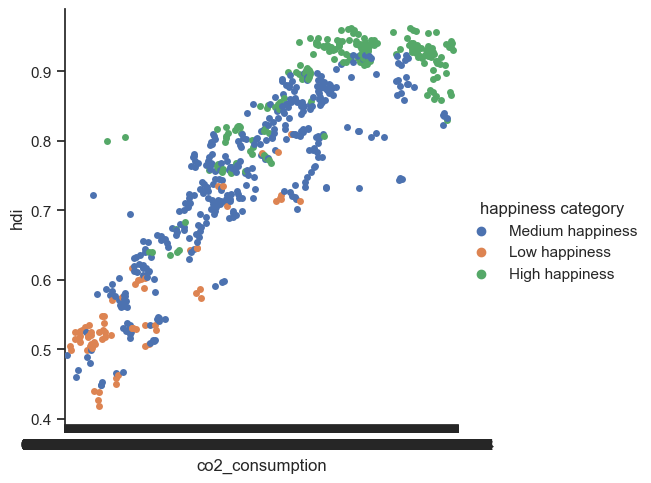

In [32]:
sns.set(style="ticks")

g = sns.catplot(x="co2_consumption", y="hdi", hue="happiness category", data=df)

Here we can observe that there are certain interesting outliers with both relatively high human development scores and high happiness values with less than average CO2 consumption. Identifying those countries will be key to answer my research questions below:

1. Which countries are both closest to a sustainable footprint (consumption-based footprint of about 2.2 tons/CO2 per capita per year) and closest to or above a high human development score (0.700 or above)?
 -> Bonus question: Adding the world happiness score (Average 5.57, lowest 2.4 and
highest 7.82) into the mix as a third variable, which countries rank highest on all
three?


2. Looking at the period from 1990 to 2020, did any countries manage to lower their consumption-based CO2 per capita? If that is the case, how this this impact their human development score? 
 -> Bonus question: How did this impact on the happiness of their population?

In [33]:
# Save image to working directory

g.savefig("catplot.png") 

## 4. Exporting dataset

In [34]:
# Export dataset as pkl

df.to_pickle(os.path.join(path, 'Prepared Data', 'all_merged.pkl'))